In [122]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import yfinance as yf

In [123]:
df1=pd.read_csv ('clean_df.csv')

In [124]:
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1

,time_close,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,10Y_Treasury,Gold,Oil,EUR_USD
symbol_id,,,,,,,,,,,,,,,,,
BTCB_4023,2020-09-24,10475.684721,1.138708e+04,0.000000e+00,9,24,3,1,-0.010546,1.915524,0.039526,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
BTCB_4023,2020-09-25,10889.743248,1.384086e+03,0.000000e+00,9,25,4,1,0.039526,-0.878451,-0.029131,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-26,10572.518703,3.690903e+03,0.000000e+00,9,26,5,0,-0.029131,1.666671,0.019034,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-27,10773.752004,6.771302e+03,0.000000e+00,9,27,6,0,0.019034,0.834592,0.006752,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-28,10846.499092,3.646642e+03,0.000000e+00,9,28,0,1,0.006752,-0.461456,-0.013387,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FTT_4195,2022-09-29,24.068050,7.976498e+07,3.224523e+09,9,29,3,1,0.015881,-0.219820,0.009143,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
FTT_4195,2022-09-30,24.288116,7.723532e+07,3.254006e+09,9,30,4,1,0.009143,-0.031714,-0.002232,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
FTT_4195,2022-10-01,24.233912,7.605522e+07,3.246744e+09,10,1,5,0,-0.002232,-0.015279,0.000811,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [125]:
dfcoin=df1.loc['XMR_328']
dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)
dfcoin.set_index(['time_close'],inplace=True)
dfcoin

/tmp/ipykernel_261/2305753644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)


,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [127]:
#Adding other coins in regression
dfBTC=df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
dfBTC1=dfBTC['BTC_close']

dfETH=df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
dfETH1=dfETH['ETH_close']

dfLTC=df1.loc['LTC_2']
dfLTC.set_index(['time_close'],inplace=True)
dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
dfLTC1=dfLTC['LTC_close']

dfXRP=df1.loc['XRP_52']
dfXRP.set_index(['time_close'],inplace=True)
dfXRP.rename(columns={'close':'XRP_close'}, inplace=True)
dfXRP1=dfXRP['XRP_close']

dfXLM=df1.loc['XLM_512']
dfXLM.set_index(['time_close'],inplace=True)
dfXLM.rename(columns={'close':'XLM_close'}, inplace=True)
dfXLM1=dfXLM['XLM_close']

dfreg=pd.concat([dfcoin,dfBTC1,dfETH1,dfLTC1,dfXRP1,dfXLM1],axis=1)
dfreg

/tmp/ipykernel_261/12690781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
/tmp/ipykernel_261/12690781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
/tmp/ipykernel_261/12690781.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
/tmp/ipykernel_261/12690

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,VIX,TY_Treasury,Gold,Oil,EUR_USD,BTC_close,ETH_close,LTC_close,XRP_close,XLM_close
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,...,28.510000,0.666,1868.300049,40.310001,1.165854,10295.054804,322.801017,43.575650,0.222924,0.068613
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,26.379999,0.659,1857.699951,40.250000,1.167324,10773.534000,348.029329,44.790372,0.231864,0.070204
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,26.379999,0.659,1857.699951,40.250000,1.167324,10668.141934,351.552190,46.090238,0.243233,0.074894
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,26.379999,0.659,1857.699951,40.250000,1.167324,10769.604523,359.182175,46.340146,0.243122,0.074085
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,26.190001,0.663,1872.800049,40.599998,1.163535,10881.984006,358.283277,46.434781,0.244379,0.074022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,31.840000,3.747,1658.500000,81.230003,0.970817,19445.124438,1333.964086,53.258766,0.447573,0.108473
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,31.620001,3.804,1662.400024,79.489998,0.982956,19532.627889,1336.776474,53.855640,0.480514,0.114305
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,31.620001,3.804,1662.400024,79.489998,0.982956,19400.000434,1327.829013,53.365201,0.475265,0.114461


EDA for XMR

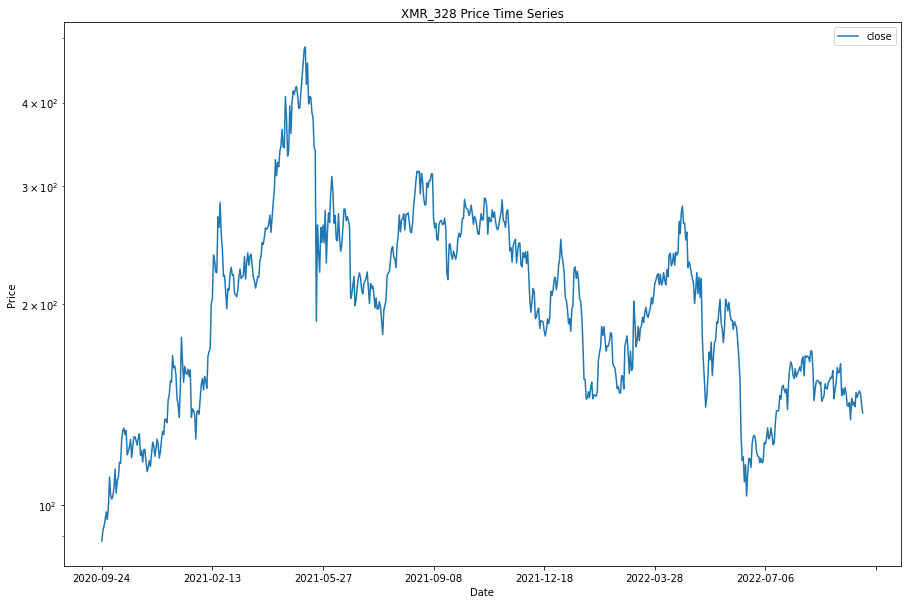

In [128]:
dfreg.plot(y=['close'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XMR_328 Price Time Series')
plt.show()

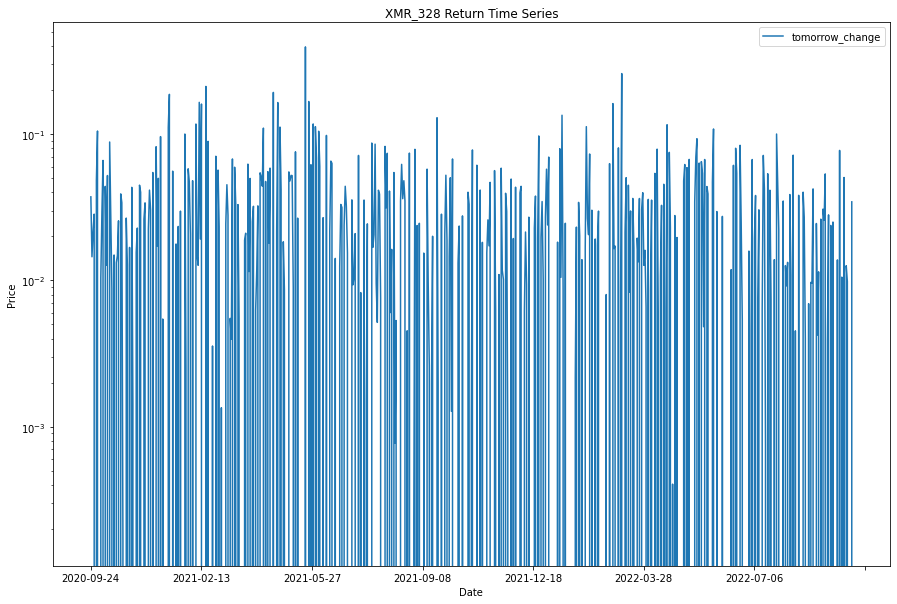

In [129]:
dfreg.plot(y=['tomorrow_change'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XMR_328 Return Time Series')
plt.show()

Test for stationarity

ADF Statistic: -8.507309
p-value: 0.000000


ADF Statistic: -1.919940
p-value: 0.322740


ADF Statistic: -2.300683
p-value: 0.171748


ADF Statistic: -4.320312
p-value: 0.000410


ADF Statistic: 0.307875
p-value: 0.977703


ADF Statistic: -2.125103
p-value: 0.234541


ADF Statistic: -1.902342
p-value: 0.330960


ADF Statistic: 0.643501
p-value: 0.988640


ADF Statistic: -1.734784
p-value: 0.413286


ADF Statistic: -1.936253
p-value: 0.315203


ADF Statistic: -1.541748
p-value: 0.512768


ADF Statistic: -1.599030
p-value: 0.484081


ADF Statistic: -2.284897
p-value: 0.176885




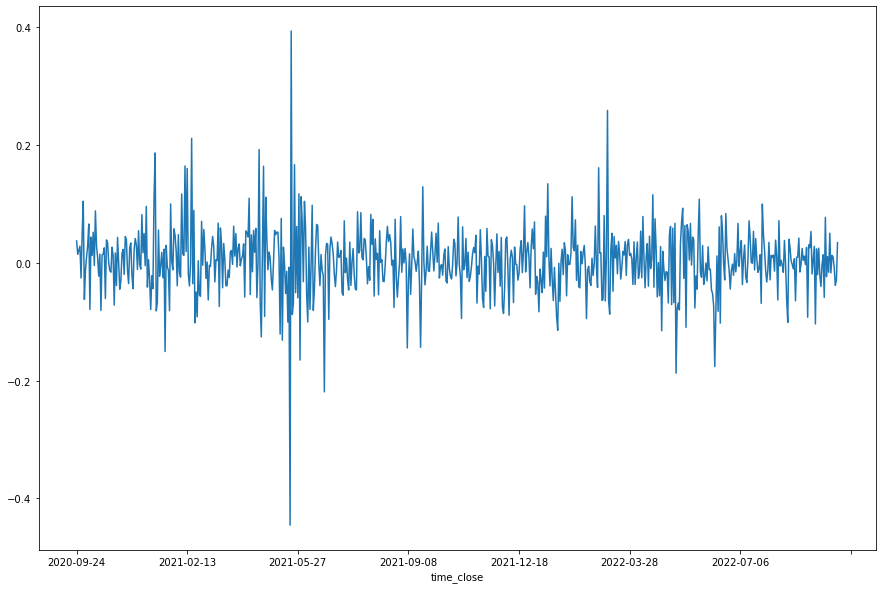

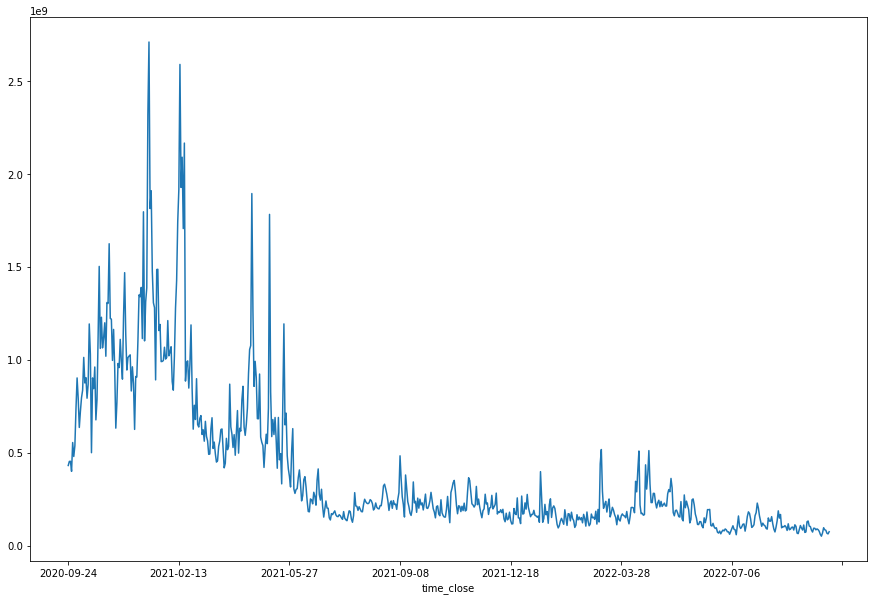

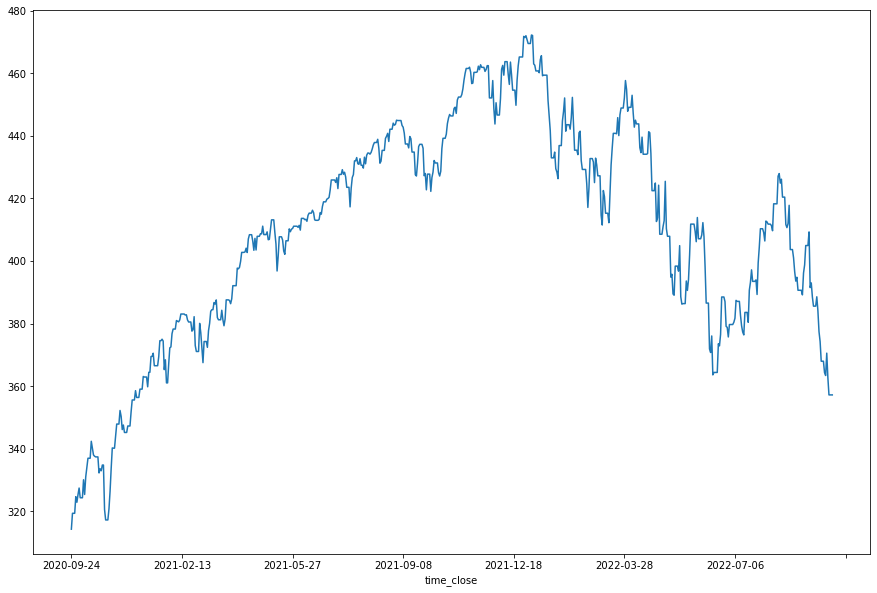

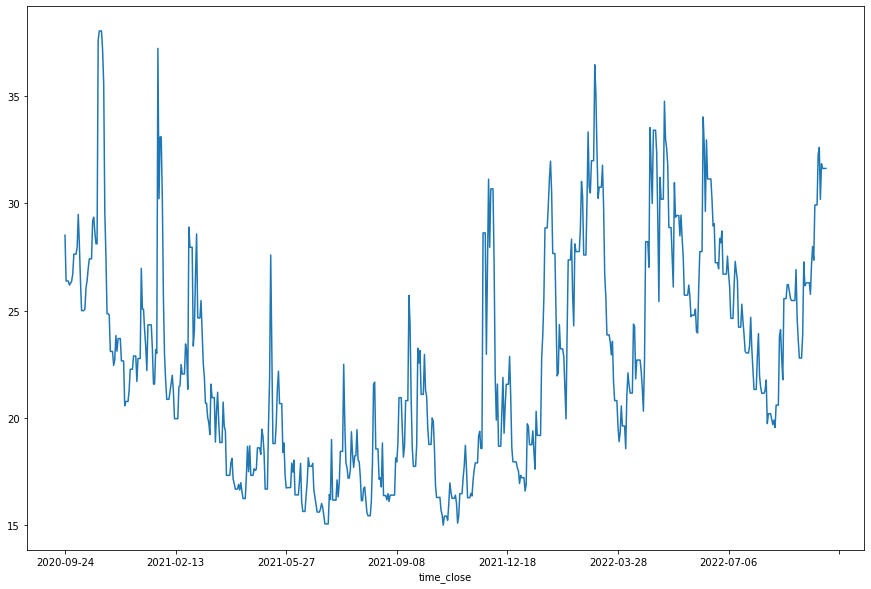

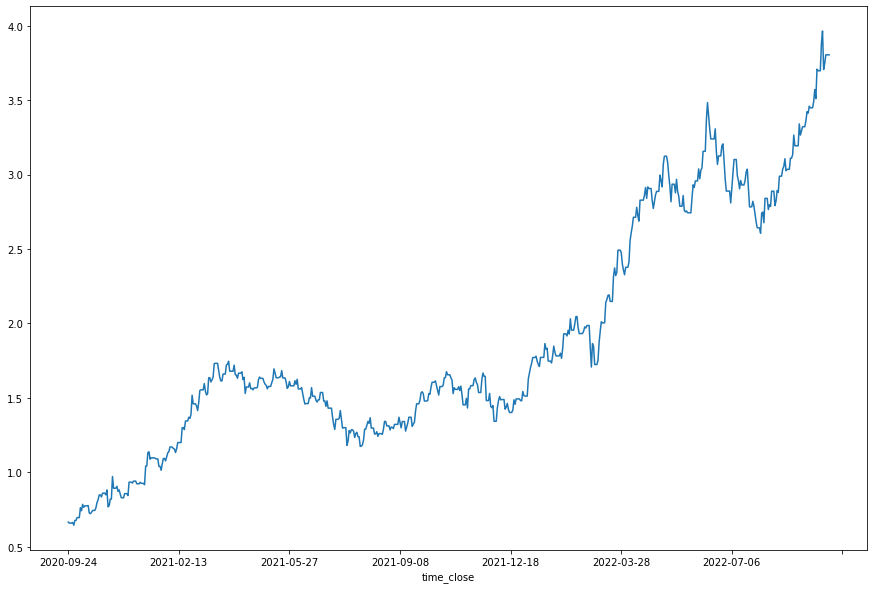

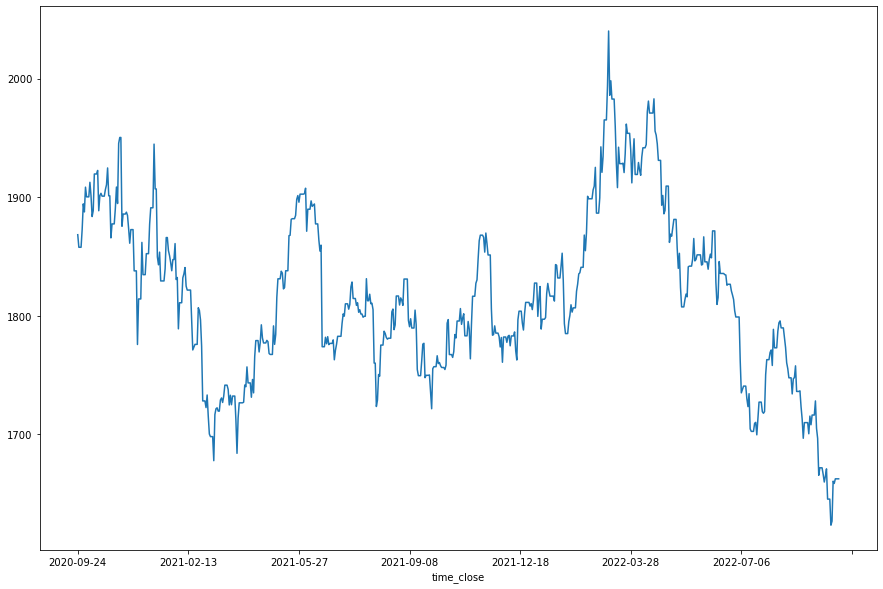

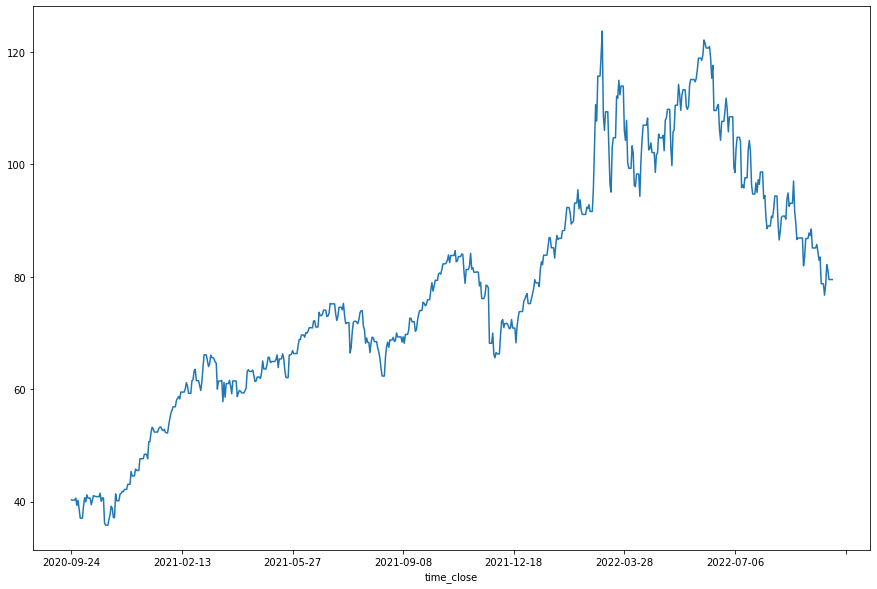

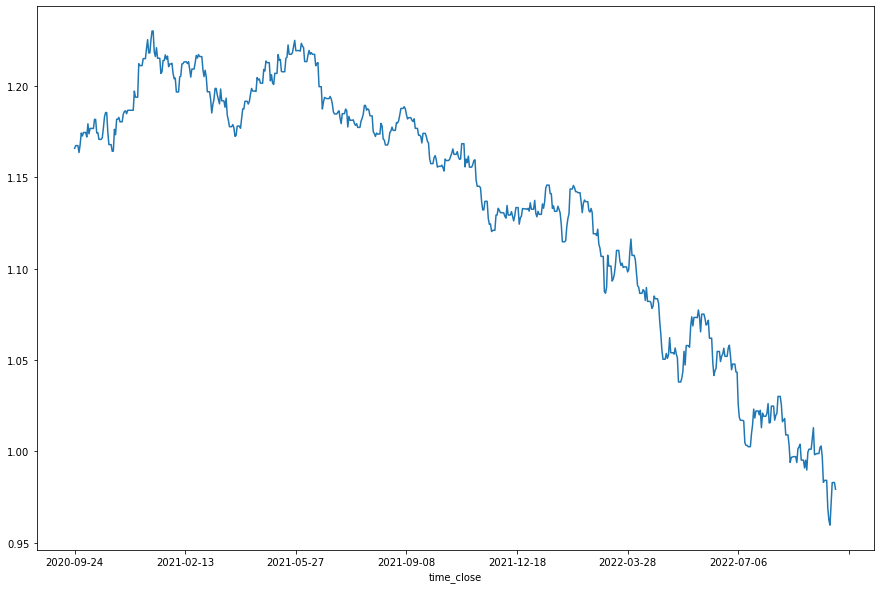

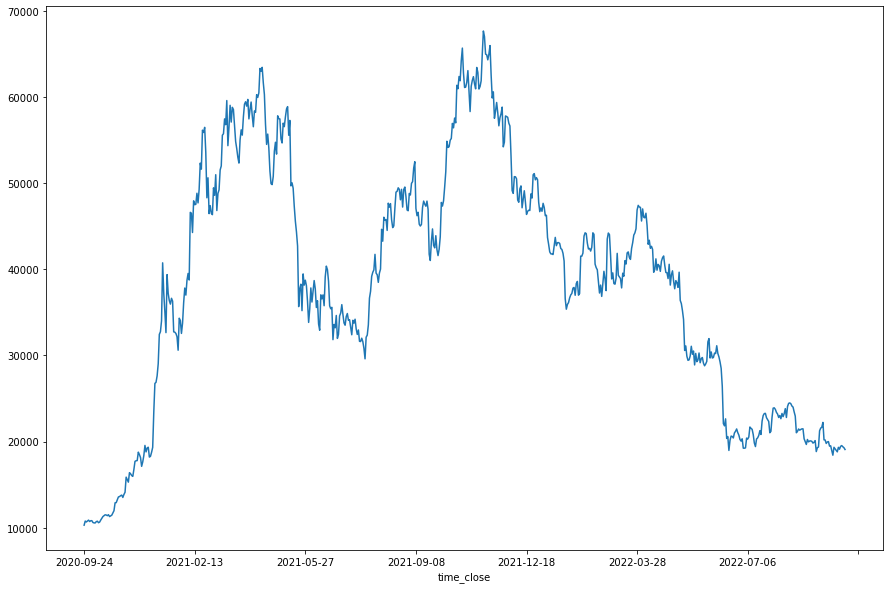

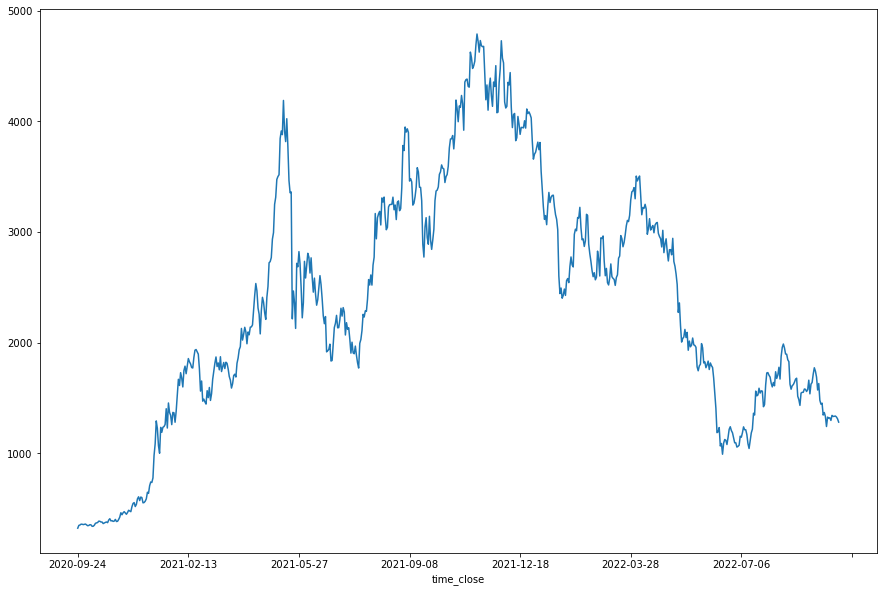

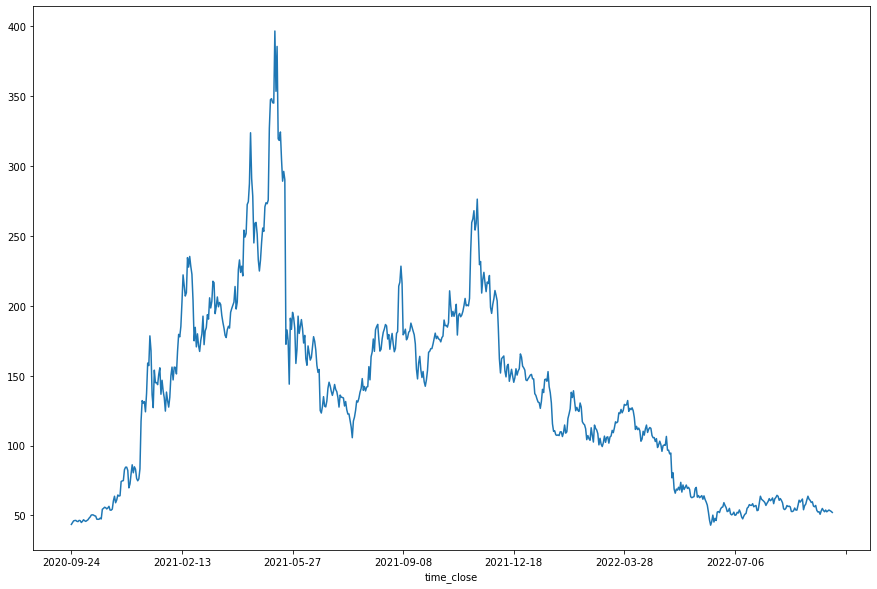

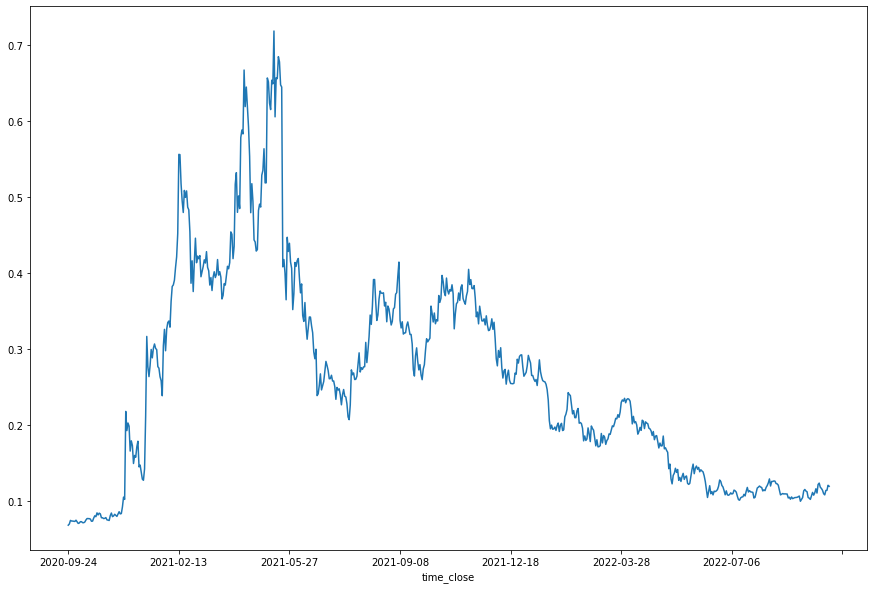

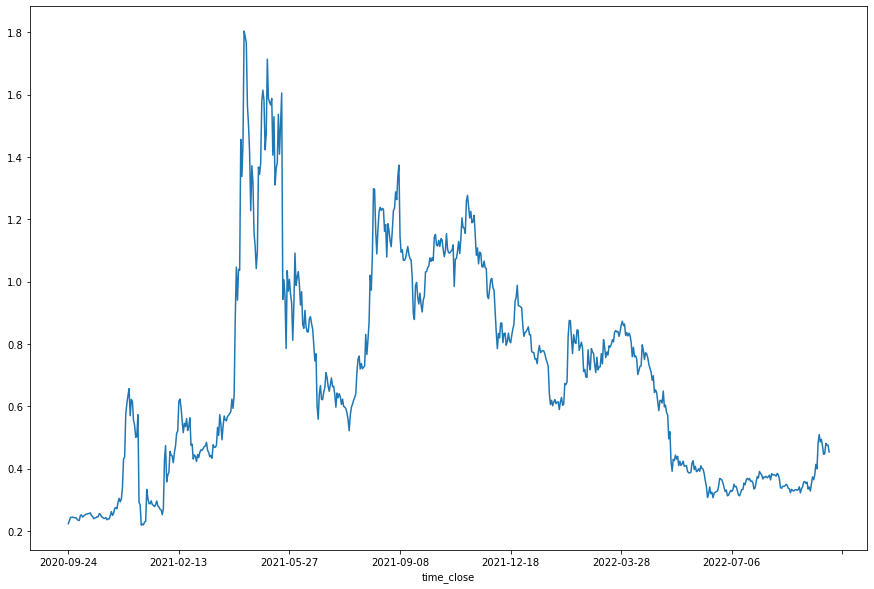

In [130]:
from statsmodels.tsa.stattools import adfuller
List=['tomorrow_change','volume','SPY','VIX','TY_Treasury','Gold','Oil','EUR_USD','BTC_close','ETH_close','LTC_close','XLM_close',
     'XRP_close']
for i in List:
    timeseries = dfreg[i].dropna()
    result = adfuller(timeseries)
    plt.figure(figsize=(15, 10))
    ax = timeseries.plot(secondary_y=False, logy=False)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')



tomorrow_change and VIX are stationary.

In [131]:
#Use percentage change for nonstationary variables
dfreg['SPY_change']=dfreg['SPY'].pct_change()
dfreg['Gold_change']=dfreg['Gold'].pct_change()
dfreg['Oil_change']=dfreg['Oil'].pct_change()
dfreg['BTC_change']=dfreg['BTC_close'].pct_change()
dfreg['ETH_change']=dfreg['ETH_close'].pct_change()
dfreg['LTC_change']=dfreg['LTC_close'].pct_change()
dfreg['XLM_change']=dfreg['XLM_close'].pct_change()
dfreg['XRP_change']=dfreg['XRP_close'].pct_change()
dfreg

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,XRP_close,XLM_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,...,0.222924,0.068613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,0.231864,0.070204,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.243233,0.074894,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.243122,0.074085,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.244379,0.074022,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,0.447573,0.108473,-0.020889,-0.001144,-0.011199,0.017353,0.000887,0.012806,-0.014612,0.004518
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,0.480514,0.114305,-0.015464,0.002352,-0.021421,0.004500,0.002108,0.011207,0.053767,0.073597
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,0.475265,0.114461,0.000000,0.000000,0.000000,-0.006790,-0.006693,-0.009107,0.001370,-0.010923


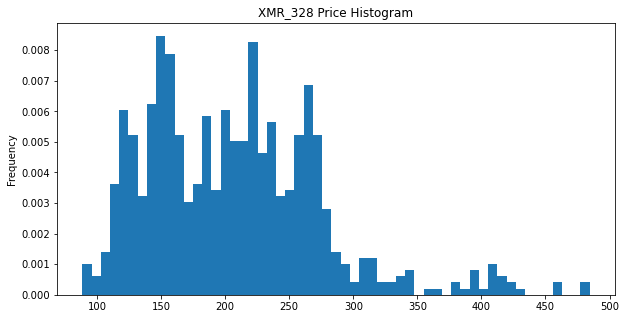

In [132]:
fig, ax = plt.subplots(figsize = (10, 5))
dfreg['close'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Price Histogram')
plt.show() 

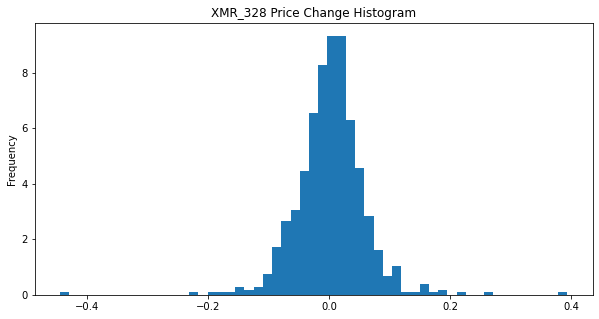

In [133]:
fig, ax = plt.subplots(figsize = (10, 5))
dfreg['tomorrow_change'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Price Change Histogram')
plt.show() 

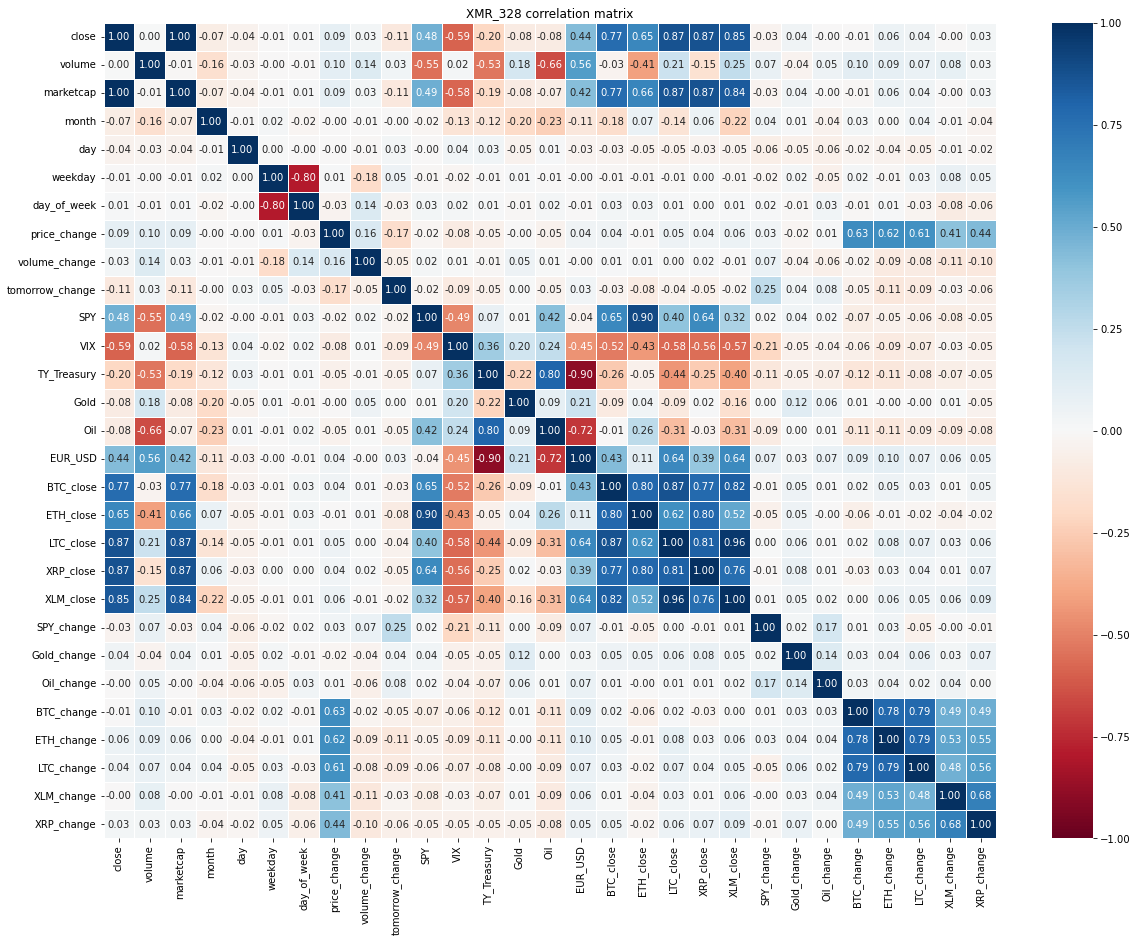

In [135]:
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dfreg.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XMR_328 correlation matrix')
plt.show()

array([<AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>], dtype=object)

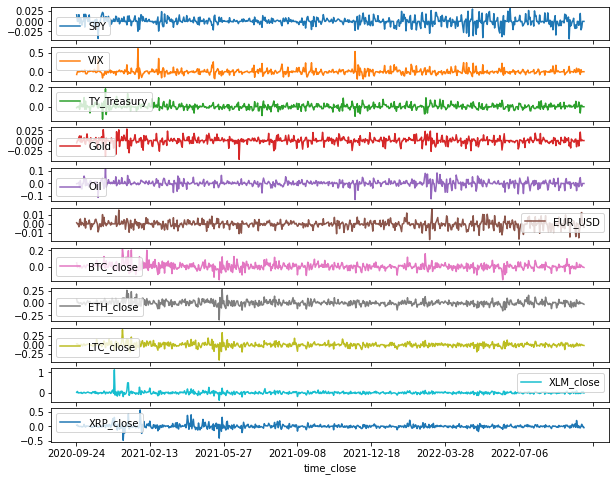

In [136]:
dfreg[['SPY', 'VIX', 'TY_Treasury', 'Gold', 'Oil', 'EUR_USD','BTC_close','ETH_close','LTC_close','XLM_close',
     'XRP_close']].pct_change().plot(subplots=True,figsize=(10,8))

In [137]:
dfreg.drop(dfreg.head(1).index, inplace=True)
dfreg.head()

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,XRP_close,XLM_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,0.231864,0.070204,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.243233,0.074894,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.243122,0.074085,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.244379,0.074022,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,1,-0.025720,-0.135473,0.048048,...,0.242533,0.073736,-0.005446,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,-0.003863,-0.007553


In [138]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfreg.copy()
y = X.pop('tomorrow_change')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [139]:
#Scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
factors = ['volume_change','SPY_change','VIX','Gold_change','Oil_change',
           'BTC_change','ETH_change','LTC_change','XLM_change','XRP_change']
scaler=StandardScaler()
X_train = pd.DataFrame(X_train[factors].copy())
X_train[factors] = scaler.fit_transform(X_train[factors])
X_test = pd.DataFrame(X_test[factors].copy())
X_test[factors] = scaler.transform(X_test[factors])

In [140]:
X_train

,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change
time_close,,,,,,,,,,
2020-09-25,0.045004,1.748851,0.895837,-0.673830,-0.156405,1.025468,1.374537,0.405888,0.233869,0.450766
2020-09-26,-0.113206,-0.055947,0.895837,0.001667,-0.092189,-0.296700,0.099950,0.424382,0.767179,0.563286
2020-09-27,-0.495519,-0.055947,0.895837,0.001667,-0.092189,0.156719,0.316929,0.043187,-0.181811,-0.060051
2020-09-28,1.116509,1.798242,0.858624,0.969418,0.282952,0.178436,-0.136579,-0.011410,-0.060092,0.010800
2020-09-29,-0.546722,-0.663905,0.874292,1.368472,-1.484187,-0.416988,-0.247204,-0.267070,-0.096926,-0.149448
...,...,...,...,...,...,...,...,...,...,...
2022-05-13,-0.562787,2.613010,1.383534,-1.068933,1.680133,-0.441552,-1.398210,-0.723880,-0.661924,-1.052906
2022-05-14,-1.477904,-0.055947,1.383534,0.001667,-0.092189,-0.022169,0.213626,0.678631,1.064334,1.172228
2022-05-15,-0.429053,-0.055947,1.383534,0.001667,-0.092189,0.297543,0.034185,-0.225610,0.211410,-0.161442


In [141]:
X_test

,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change
time_close,,,,,,,,,,
2022-05-18,-0.372803,-4.556143,1.792885,-0.148936,-1.170726,0.229833,0.341277,1.250312,0.285736,0.205686
2022-05-19,-0.468885,-0.739666,1.477547,1.660439,0.939206,-1.309356,-1.536830,-1.572665,-1.278695,-0.907168
2022-05-20,-0.166610,-0.007217,1.493216,0.040471,0.299972,1.018546,0.714742,1.188034,0.317770,0.379319
2022-05-21,1.612420,-0.055947,1.493216,0.001667,-0.092189,-0.814055,-0.569758,-0.772950,-0.542573,-0.457946
2022-05-22,-1.370116,-0.055947,1.493216,0.001667,-0.092189,0.086884,0.054155,0.306010,0.576662,0.092180
...,...,...,...,...,...,...,...,...,...,...
2022-09-29,-0.482845,-2.387890,1.965244,-0.134574,-0.575330,0.341033,-0.073066,0.162452,-0.228361,0.002592
2022-09-30,-0.212382,-1.782221,1.922154,0.281636,-1.016309,0.038959,-0.050193,0.136631,0.607791,0.872642
2022-10-01,-0.741211,-0.055947,1.922154,0.001667,-0.092189,-0.226374,-0.215092,-0.191496,-0.032932,-0.191887


Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [143]:
#from sklearn import linear_model
#reg = linear_model.LinearRegression()
#reg.fit(X_train,y_train)
#LinearRegression()
#reg.coef_

In [144]:
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [145]:
model.coef_

array([-0.00475116,  0.01284628, -0.00323179,  0.00141688,  0.00228409,
        0.00766952, -0.01365604, -0.00229867,  0.00324374, -0.00139907])

              Actual  Predicted
time_close                     
2022-05-18 -0.109457  -0.067534
2022-05-19  0.064800   0.007166
2022-05-20  0.053748  -0.004528
2022-05-21  0.004827  -0.008183
2022-05-22  0.067004   0.004758
...              ...        ...
2022-09-29  0.009835  -0.030706
2022-09-30 -0.008111  -0.025563
2022-10-01 -0.038118   0.001222
2022-10-02 -0.028520   0.002834
2022-10-03  0.034424  -0.000916

[138 rows x 2 columns]
Coefficient of determination: 0.17


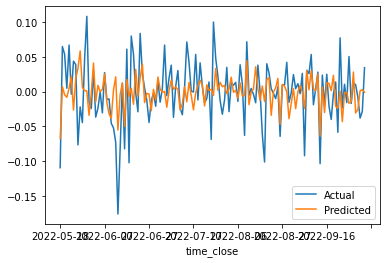

In [146]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()

Decision Tree Regression

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42,min_samples_leaf=10)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

In [149]:
y_pred1 = tree_reg.predict(X_test)

              Actual  Predicted
time_close                     
2022-05-18 -0.109457  -0.067644
2022-05-19  0.064800   0.009244
2022-05-20  0.053748   0.009244
2022-05-21  0.004827  -0.032889
2022-05-22  0.067004   0.009244
...              ...        ...
2022-09-29  0.009835  -0.067644
2022-09-30 -0.008111  -0.005075
2022-10-01 -0.038118   0.009244
2022-10-02 -0.028520   0.009244
2022-10-03  0.034424   0.009244

[138 rows x 2 columns]
Coefficient of determination: 0.17


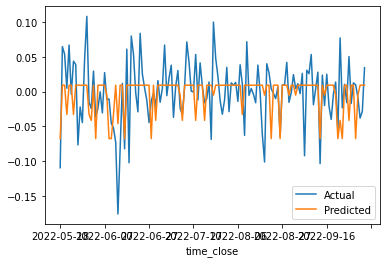

In [150]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred1.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()

In [151]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [152]:
X_train, y_train = make_regression(n_samples=550, n_features=10,
                        n_informative=2, n_targets=1,
                        random_state=42, shuffle=False)
regr = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=8, random_state=42).fit(X_train, y_train)
y_pred2=regr.predict(X_test)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 10 features, but BaggingRegressor is expecting 8 features as input.

              Actual  Predicted
time_close                     
2022-05-18 -0.109457        0.0
2022-05-19  0.064800        1.0
2022-05-20  0.053748        1.0
2022-05-21  0.004827        0.0
2022-05-22  0.067004        1.0
...              ...        ...
2022-09-29  0.009835        0.0
2022-09-30 -0.008111        1.0
2022-10-01 -0.038118        1.0
2022-10-02 -0.028520        1.0
2022-10-03  0.034424        0.0

[138 rows x 2 columns]
Coefficient of determination: 0.17


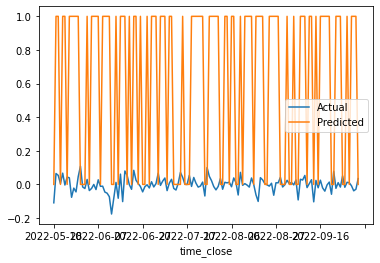

In [153]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred2.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()

Logistic Regression

In [154]:
dfreg

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,XRP_close,XLM_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,0.231864,0.070204,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.243233,0.074894,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.243122,0.074085,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.244379,0.074022,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,1,-0.025720,-0.135473,0.048048,...,0.242533,0.073736,-0.005446,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,-0.003863,-0.007553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,0.447573,0.108473,-0.020889,-0.001144,-0.011199,0.017353,0.000887,0.012806,-0.014612,0.004518
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,0.480514,0.114305,-0.015464,0.002352,-0.021421,0.004500,0.002108,0.011207,0.053767,0.073597
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,0.475265,0.114461,0.000000,0.000000,0.000000,-0.006790,-0.006693,-0.009107,0.001370,-0.010923


Create Dummy variables

In [155]:
dfreg['TomorrowTrend'] = pd.cut(x=dfreg['tomorrow_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Tomorrow'] = dfreg['TomorrowTrend'].map({'Decrease':0,'Increase':1})
dfreg['Tomorrow'] = dfreg['Tomorrow'].astype(float)

In [156]:
dfreg['PriceTrend'] = pd.cut(x=dfreg['price_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Price'] = dfreg['PriceTrend'].map({'Decrease':0,'Increase':1})
dfreg['Price'] = dfreg['Price'].astype(float)

In [157]:
dfreg.head()

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change,TomorrowTrend,Tomorrow,PriceTrend,Price
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102,Increase,1.0,Increase,1.0
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036,Increase,1.0,Increase,1.0
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456,Increase,1.0,Increase,1.0
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170,Decrease,0.0,Increase,1.0
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,1,-0.025720,-0.135473,0.048048,...,-0.032266,-0.014901,-0.008407,-0.013785,-0.003863,-0.007553,Increase,1.0,Decrease,0.0


In [158]:
dfreg['VolumeTrend'] = pd.cut(x=dfreg['volume_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Volume'] = dfreg['VolumeTrend'].map({'Decrease':0,'Increase':1})
dfreg['Volume'] = dfreg['Volume'].astype(float)

In [159]:
dfreg['BTCTrend'] = pd.cut(x=dfreg['BTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['BTC'] = dfreg['BTCTrend'].map({'Decrease':0,'Increase':1})
dfreg['BTC'] = dfreg['BTC'].astype(float)

In [160]:
dfreg['ETHTrend'] = pd.cut(x=dfreg['ETH_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['ETH'] = dfreg['ETHTrend'].map({'Decrease':0,'Increase':1})
dfreg['ETH'] = dfreg['ETH'].astype(float)

In [161]:
dfreg['LTCTrend'] = pd.cut(x=dfreg['LTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['LTC'] = dfreg['LTCTrend'].map({'Decrease':0,'Increase':1})
dfreg['LTC'] = dfreg['LTC'].astype(float)

In [162]:
dfreg['SPYTrend'] = pd.cut(x=dfreg['SPY_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['SPY'] = dfreg['SPYTrend'].map({'Decrease':0,'Increase':1})
dfreg['SPY'] = dfreg['SPY'].astype(float)

In [163]:
dfreg['GoldTrend'] = pd.cut(x=dfreg['Gold_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Gold'] = dfreg['GoldTrend'].map({'Decrease':0,'Increase':1})
dfreg['Gold'] = dfreg['Gold'].astype(float)

In [164]:
dfreg['OilTrend'] = pd.cut(x=dfreg['Oil_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Oil'] = dfreg['OilTrend'].map({'Decrease':0,'Increase':1})
dfreg['Oil'] = dfreg['Oil'].astype(float)

In [165]:
dfreg['XLMTrend'] = pd.cut(x=dfreg['XLM_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['XLM'] = dfreg['XLMTrend'].map({'Decrease':0,'Increase':1})
dfreg['XLM'] = dfreg['XLM'].astype(float)

In [166]:
dfreg['XRPTrend'] = pd.cut(x=dfreg['XRP_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['XRP'] = dfreg['XRPTrend'].map({'Decrease':0,'Increase':1})
dfreg['XRP'] = dfreg['XRP'].astype(float)

In [167]:
dfreg.head()

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,ETH,LTCTrend,LTC,SPYTrend,GoldTrend,OilTrend,XLMTrend,XLM,XRPTrend,XRP
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,1.0,Increase,1.0,Increase,Decrease,Decrease,Increase,1.0,Increase,1.0
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,1.0,Increase,1.0,Decrease,Decrease,Decrease,Increase,1.0,Increase,1.0
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,1.0,Increase,1.0,Decrease,Decrease,Decrease,Decrease,0.0,Decrease,0.0
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.0,Increase,1.0,Increase,Increase,Increase,Decrease,0.0,Increase,1.0
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,1,-0.025720,-0.135473,0.048048,...,0.0,Decrease,0.0,Decrease,Increase,Decrease,Decrease,0.0,Decrease,0.0


In [172]:
dflog=dfreg[['weekday','Price','Volume','BTC','ETH','LTC','SPY','Gold','Oil','Tomorrow','XLM','XRP']]

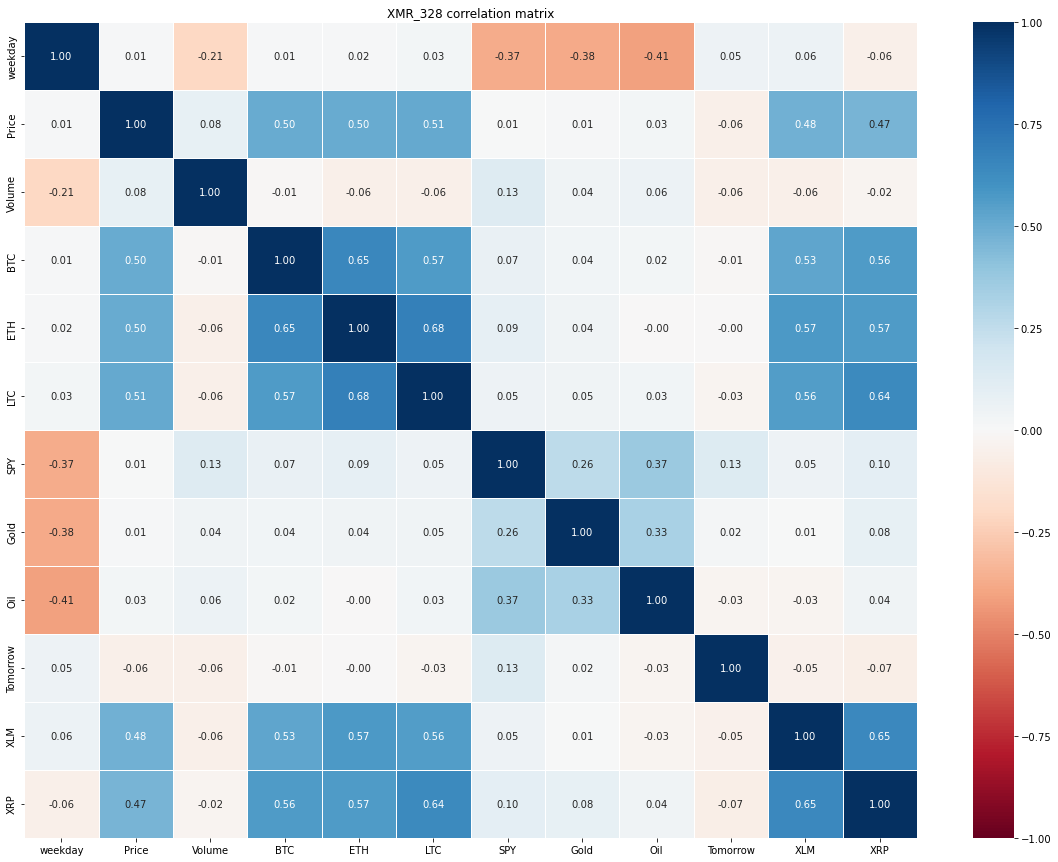

In [173]:
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dflog.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XMR_328 correlation matrix')
plt.show()

In [174]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfreg[['weekday','Price','Volume','BTC','ETH','LTC','SPY','Gold','Oil','Tomorrow','XLM','XRP']]
y = X.pop('Tomorrow')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=False)
X_train

,weekday,Price,Volume,BTC,ETH,LTC,SPY,Gold,Oil,XLM,XRP
time_close,,,,,,,,,,,
2020-09-25,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2020-09-26,5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2020-09-27,6,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-09-28,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2020-09-29,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2022-05-14,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2022-05-15,6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
logisticRegr = LogisticRegression()
model = logisticRegr.fit(X_train, y_train)
y_pred2=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.5652173913043478
